# Sample Data Load

In [1]:
import os
import pandas as pd
root_dir ='data/0421mode_변환'
files = os.listdir(root_dir)

In [8]:
files

['ftp_p3_Converted.txt', 'ftp_p1p2_Converted.txt', 'hwy_Converted.txt']

In [4]:
use_cols = ['time','Ambient','EGSPD','VSPD_ajou','TQI_ACOR','TQI','Coolant','VSPD2','Fan_curr','C_Rad_in',
           'C_Head','C_H\C_out','Target_angle','Current_angle']
p1p2_df = pd.read_csv(root_dir+'/ftp_p1p2_Converted.txt',sep='\t',skiprows=[1],usecols=use_cols)
p1p2_df.head()

,time,Ambient,EGSPD,VSPD_ajou,TQI_ACOR,TQI,Coolant,VSPD2,Fan_curr,C_Rad_in,C_Head,C_H\C_out,Target_angle,Current_angle
0,0.040727,24.5,0.0,0,58.203125,0.0,24.75,0.0,-0.591950,25.124000,25.20000,25.162000,0.0,0.0
1,0.050572,24.5,0.0,0,58.203125,0.0,24.75,0.0,-0.591950,25.124000,25.20000,25.162000,0.0,0.0
2,0.060581,24.5,0.0,0,58.203125,0.0,24.75,0.0,-0.591950,25.124000,25.20000,25.162000,0.0,0.0
3,0.070663,24.5,0.0,0,58.203125,0.0,24.75,0.0,-0.593844,25.124000,25.20000,25.162000,0.0,0.0
4,0.080730,24.5,0.0,0,58.203125,0.0,24.75,0.0,-0.612541,25.124002,25.19998,25.161992,0.0,0.0


In [6]:
p3_df = pd.read_csv(root_dir+'/ftp_p3_Converted.txt',sep='\t',skiprows=[1],usecols=use_cols)
p3_df.head()

,time,Ambient,EGSPD,VSPD_ajou,TQI_ACOR,TQI,Coolant,VSPD2,Fan_curr,C_Rad_in,C_Head,C_H\C_out,Target_angle,Current_angle
0,0.047340,28.5,0.0,0,50.78125,0.0,84.75,0.0,-0.660775,98.362,102.809,85.295,0.0,0.0
1,0.057112,28.5,0.0,0,50.78125,0.0,84.75,0.0,-0.660775,98.362,102.809,85.295,0.0,0.0
2,0.066428,28.5,0.0,0,50.78125,0.0,84.75,0.0,-0.656157,98.362,102.809,85.295,0.0,0.0
3,0.077380,28.5,0.0,0,50.78125,0.0,84.75,0.0,-0.641780,98.362,102.809,85.295,0.0,0.0
4,0.087161,28.5,0.0,0,50.78125,0.0,84.75,0.0,-0.633998,98.362,102.809,85.295,0.0,0.0


In [9]:
hwy_df = pd.read_csv(root_dir+'/hwy_Converted.txt',sep='\t',skiprows=[1],usecols=use_cols)
hwy_df.head()

,time,Ambient,EGSPD,VSPD_ajou,TQI_ACOR,TQI,Coolant,VSPD2,Fan_curr,C_Rad_in,C_Head,C_H\C_out,Target_angle,Current_angle
0,0.042003,29.5,0.0,0,51.5625,0.0,75.75,0.0,-0.623325,85.813,90.126,72.474,0.0,0.0
1,0.052022,29.5,0.0,0,51.5625,0.0,75.75,0.0,-0.623325,85.813,90.126,72.474,0.0,0.0
2,0.062091,29.5,0.0,0,51.5625,0.0,75.75,0.0,-0.623325,85.813,90.126,72.474,0.0,0.0
3,0.072227,29.5,0.0,0,51.5625,0.0,75.75,0.0,-0.635830,85.813,90.126,72.474,0.0,0.0
4,0.082005,29.5,0.0,0,51.5625,0.0,75.75,0.0,-0.631047,85.813,90.126,72.474,0.0,0.0


# Arima를 통한 target 예측

$\partial t$는 일정하다고 가정

## Target value 확인

In [15]:
target_cols = ['Coolant','C_Rad_in','C_Head','C_H\C_out']
df = p1p2_df.append([p3_df,hwy_df],ignore_index=True)
target_df = df[target_cols]
target_df.head()

,Coolant,C_Rad_in,C_Head,C_H\C_out
0,24.75,25.124000,25.20000,25.162000
1,24.75,25.124000,25.20000,25.162000
2,24.75,25.124000,25.20000,25.162000
3,24.75,25.124000,25.20000,25.162000
4,24.75,25.124002,25.19998,25.161992


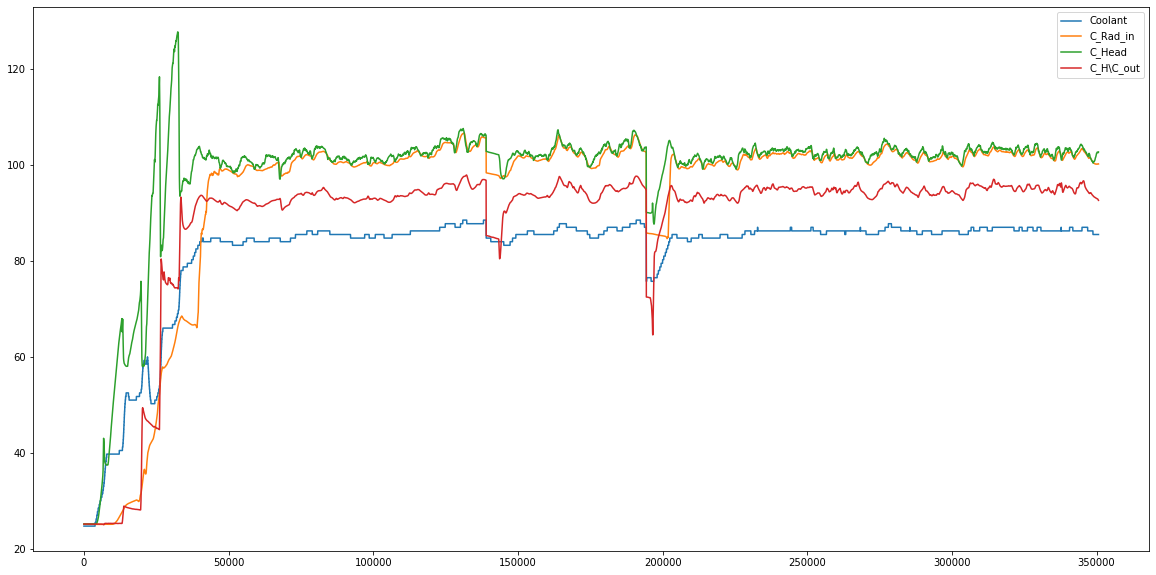

In [30]:
import matplotlib.pyplot as plt
target_df.plot(figsize=(20,10))
plt.show()

## auto Arima

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

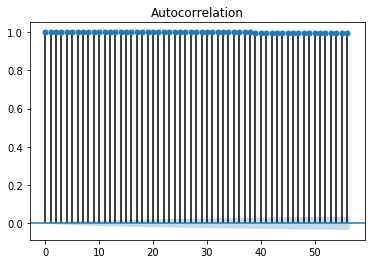

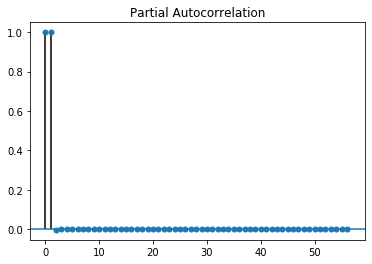

In [36]:
plot_acf(target_df[target_cols[0]]) ## 자기상관함수
plot_pacf(target_df[target_cols[0]]) ## 부분 자기상관함수
plt.show()

In [40]:
def evaluate_arima_model(X,arima_order):
    train_size = int(len(X)*0.66)
    train,test = X[0:train_size],X[train_size:]
    history = [x for x in train]
    
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history,order=arima_order)
        model_fit = model.fit(disp=0)
        y_pred = model_fit.forcast()[0]
        predictions.append(y_pred)
        history.append(test[t])
    
    error = mean_squared_error(test,predictions)
    return error

In [42]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [45]:
## 자기상관도가 없어서 ARIMA로는 분석불가
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(target_df[target_cols[0]].values, p_values, d_values, q_values)

Best ARIMANone MSE=inf
